In [94]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
def load_data(fname,conditions):
    condition_dfs = []
    for condition in conditions:
        condition_df = pd.read_excel(io=fname,sheet_name=condition)
        condition_dfs.append(condition_df)
    return condition_dfs

def draw_subplots(data1, data2, title, output_dir):
    '''this function takes two dataframes from a .xlsx file and returns a subplot with two boxplots'''
    sns.set_theme(style=('ticks'), palette="pastel") # ticks on axis
    fig, axs = plt.subplots(2,1,figsize=(7,10))
    axs[0].set_title(title)
    sns.boxplot(ax=axs[0], x="AREA", y="EXPRESSION",
                hue="HABITUATION", palette=["m", "g"],
                data=data1, showfliers=False, 
                boxprops=dict(alpha=.55)).set(xlabel='Area',ylabel="Relative Expression/18s")
    sns.stripplot(ax=axs[0], x = "AREA", y = "EXPRESSION",
                  hue="HABITUATION", jitter=True, dodge=True, palette=["m", "g"],
                  data=data1, edgecolor='black', linewidth=0.5, legend=False)
    sns.despine(ax=axs[0], offset=10, trim=True)
    sns.boxplot(ax=axs[1], x="AREA", y="EXPRESSION",
                hue="HABITUATION", palette=["m", "g"],
                data=data2, showfliers=False,
                boxprops=dict(alpha=.55)).set(xlabel='Area',ylabel="Relative Expression/18s")
    sns.stripplot(ax=axs[1], x = "AREA", y = "EXPRESSION", 
                  hue="HABITUATION", jitter=True, dodge=True, palette=["m", "g"], 
                  data=data2, edgecolor='black', linewidth=0.5, legend=False)
    sns.despine(ax=axs[1], offset=10, trim=True)
    plt.savefig(output_dir)
    plt.show()

In [109]:
INPUT_FILE = 'Data/OT.xlsx'
CONDITIONS = ['familiar_cfos', 'familiar_egr1', 
              'number_cfos', 'number_egr1',
              'shape_cfos', 'shape_egr1',
              'biggerArea_cfos',  'biggerArea_egr1',
              'smallerArea_cfos','smallerArea_egr1']
TITLES = ['Familiar',
          'Change in number',
          'Change in shape',
          'Change in surface (bigger)', 
          'Change in surface (smaller)']

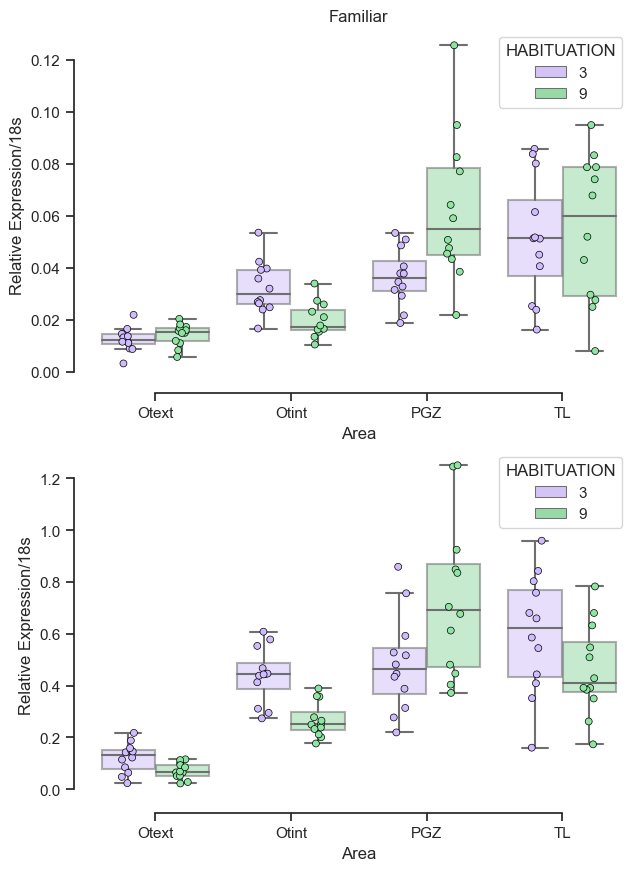

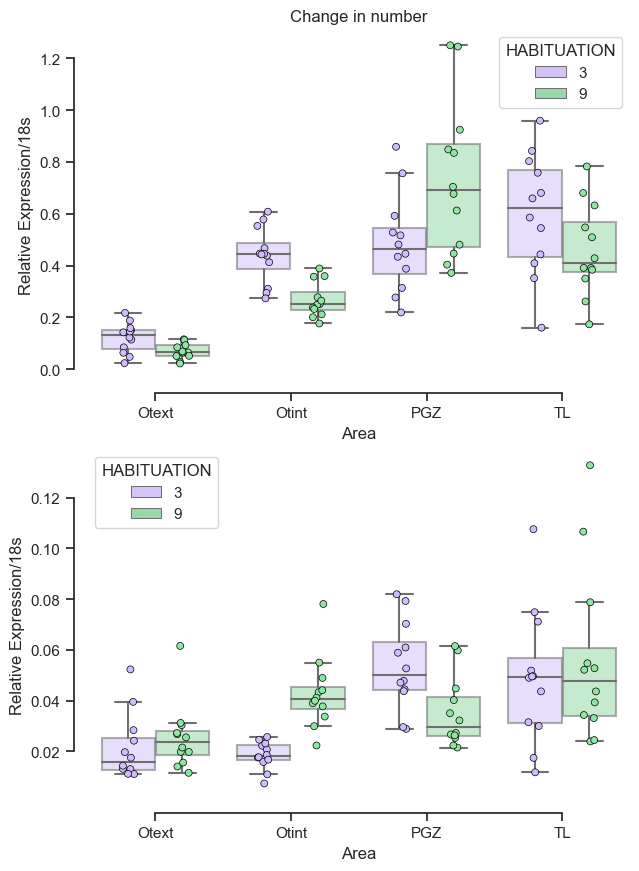

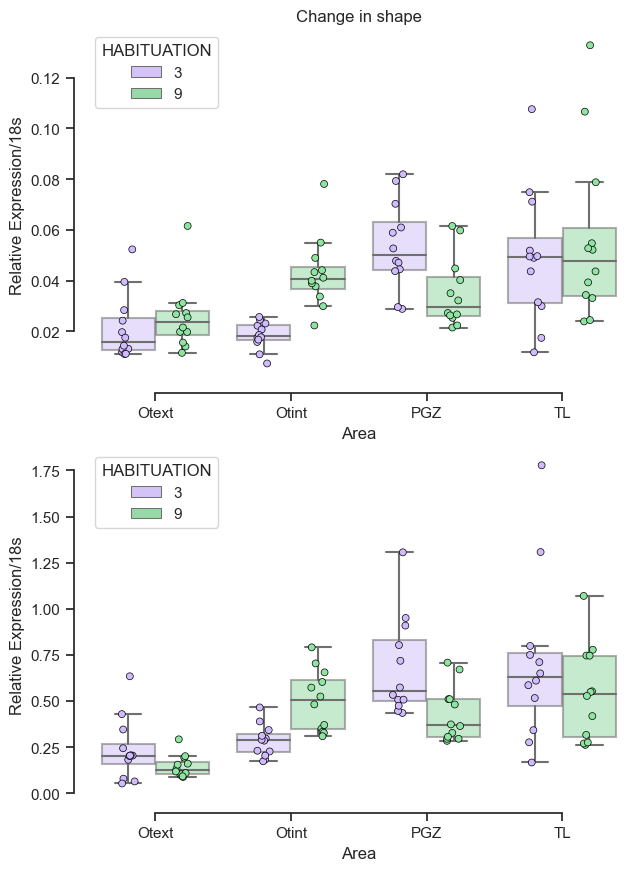

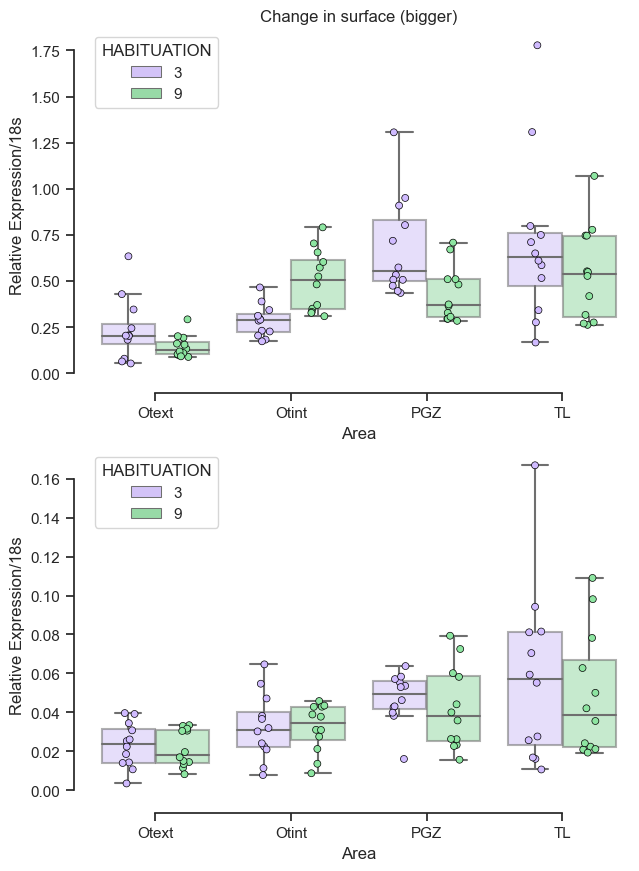

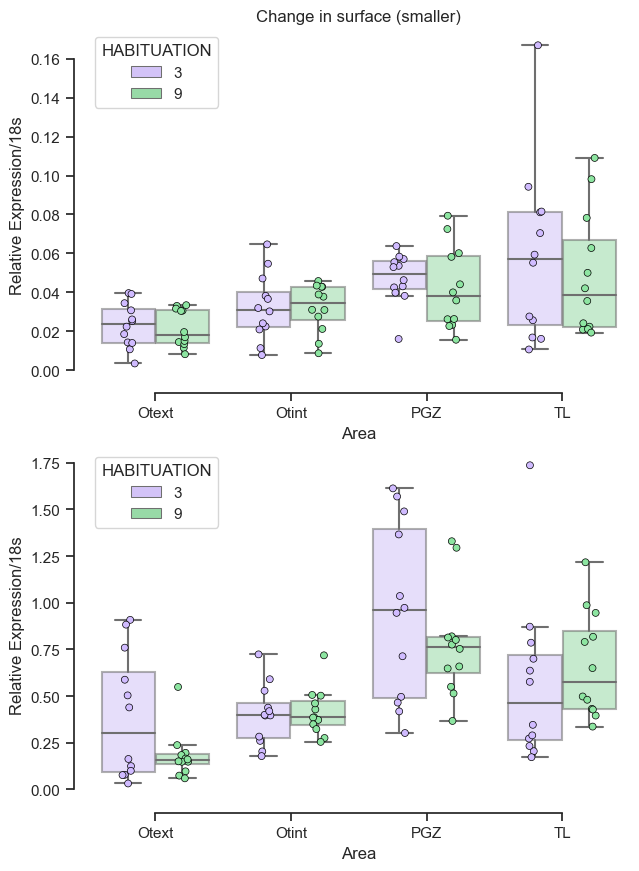

In [113]:
dfs = load_data(fname=INPUT_FILE,conditions=CONDITIONS)
for index, df in enumerate(dfs):
    try:
        figure_dir = f'./Desktop/boxplots/{index}'
        os.makedirs(figure_dir)
    except:
        FileExistsError
    draw_subplots(data1=dfs[index],data2=dfs[index+1],title=TITLES[index],output_dir=figure_dir)
    if index == 4:
        break